In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Pankaj-Str/Complete-Python-Mastery/refs/heads/main/40%20Day%20Matplotlib%20Advance/CaseStudy_WSJ_market-data/HistoricalPrices.csv')
df.head()

,Date,Open,High,Low,Close
0,01/19/24,37572.50,37933.73,37451.71,37863.80
1,01/18/24,37300.81,37522.29,37122.95,37468.61
2,01/17/24,37281.86,37371.66,37132.89,37266.67
3,01/16/24,37493.54,37543.18,37201.39,37361.12
4,01/12/24,37818.05,37825.27,37470.19,37592.98


##### As we can see there are uneccesary whitespaces in column name. So removing the whitespaces

In [3]:
df.columns

Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')

In [4]:
columns = df.columns.to_list()
df.columns = list(map(lambda x: x.strip(), columns))

##### Convert the date column into datetime

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1   Open    61 non-null     float64
 2   High    61 non-null     float64
 3   Low     61 non-null     float64
 4   Close   61 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.5+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    61 non-null     datetime64[ns]
 1   Open    61 non-null     float64       
 2   High    61 non-null     float64       
 3   Low     61 non-null     float64       
 4   Close   61 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.5 KB


In [7]:
df = df.sort_values(by='Date',ascending=True).reset_index()
df.head()

,index,Date,Open,High,Low,Close
0,60,2023-10-23,32993.02,33234.85,32892.19,32936.41
1,59,2023-10-24,33089.64,33272.19,32988.43,33141.38
2,58,2023-10-25,33203.53,33267.91,32989.72,33035.93
3,57,2023-10-26,33017.17,33105.03,32743.99,32784.30
4,56,2023-10-27,32782.40,32787.56,32327.20,32417.59


In [8]:
df.drop(columns='index', inplace=True)

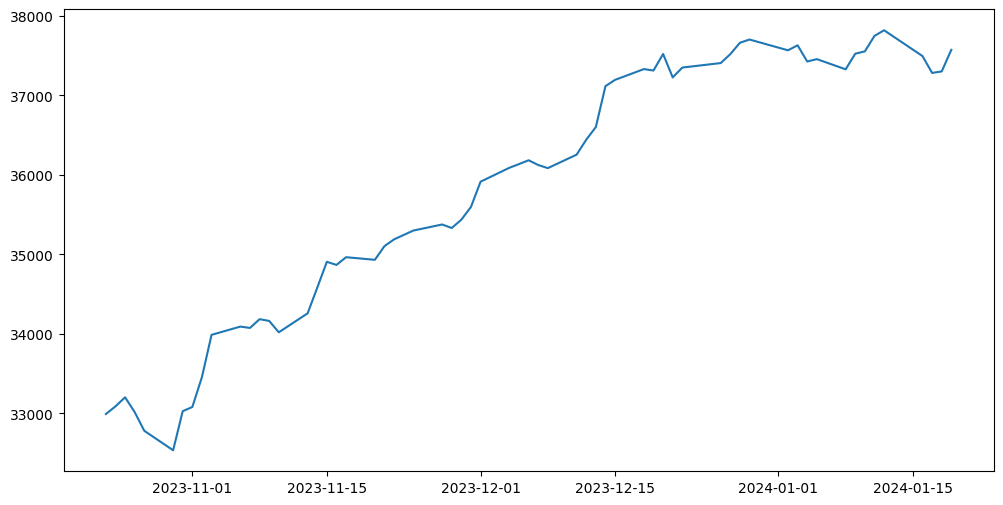

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'])
plt.show()


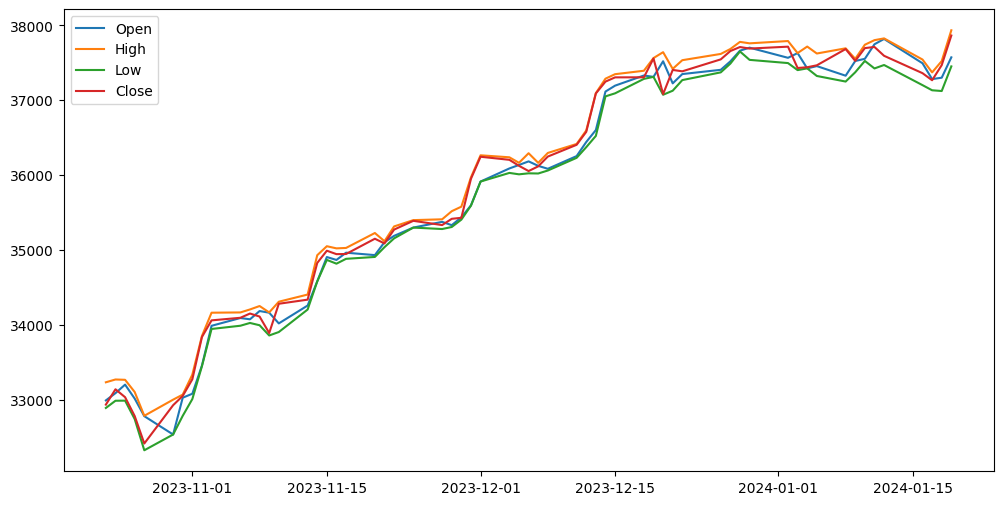

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open')
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df['Date'], df['Close'], label='Close')
plt.legend()
plt.show()


##### Aggregation by month with avg close, open, high and low

In [11]:
df['Month'] = df['Date'].dt.month_name()

monthly = df.groupby(['Month']).agg({
    'Open': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Close': 'mean'
}).round(2)

In [12]:
monthly.sort_index(axis=0)

,Open,High,Low,Close
Month,,,,
December,36858.25,37027.69,36772.51,36947.93
January,37514.92,37672.57,37353.63,37555.37
November,34615.04,34782.68,34549.07,34704.50
October,32950.34,33105.83,32752.31,32899.63


<function matplotlib.pyplot.show(close=None, block=None)>

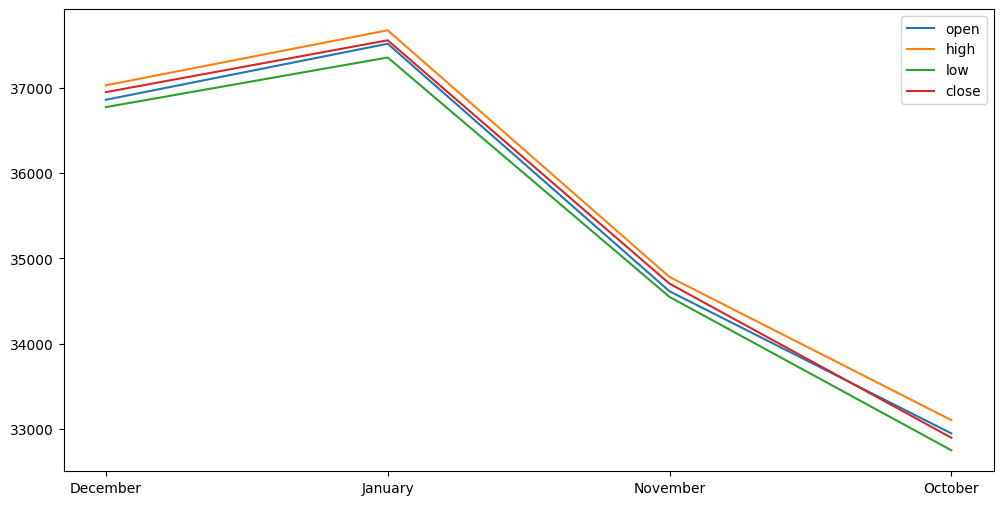

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(monthly.index, monthly['Open'], label='open')
plt.plot(monthly.index, monthly['High'], label='high')
plt.plot(monthly.index, monthly['Low'], label='low')
plt.plot(monthly.index, monthly['Close'], label='close')
plt.legend()
plt.show

##### Doing the aggreagation by year and month

In [14]:
df['Year'] = df['Date'].dt.year

In [15]:
df.head()

,Date,Open,High,Low,Close,Month,Year
0,2023-10-23,32993.02,33234.85,32892.19,32936.41,October,2023
1,2023-10-24,33089.64,33272.19,32988.43,33141.38,October,2023
2,2023-10-25,33203.53,33267.91,32989.72,33035.93,October,2023
3,2023-10-26,33017.17,33105.03,32743.99,32784.30,October,2023
4,2023-10-27,32782.40,32787.56,32327.20,32417.59,October,2023


In [26]:
year_month_ag = df.groupby(['Year', 'Month']).agg({
    'Open': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Close': 'mean'
}).round(2)
year_month_ag.head()

Open      High       Low     Close
Year Month                                           
2023 December  36858.25  37027.69  36772.51  36947.93
     November  34615.04  34782.68  34549.07  34704.50
     October   32950.34  33105.83  32752.31  32899.63
2024 January   37514.92  37672.57  37353.63  37555.37

In [27]:
year_month_ag.sort_index(level=['Year', 'Month'],ascending=[True, False])

Open      High       Low     Close
Year Month                                           
2023 October   32950.34  33105.83  32752.31  32899.63
     November  34615.04  34782.68  34549.07  34704.50
     December  36858.25  37027.69  36772.51  36947.93
2024 January   37514.92  37672.57  37353.63  37555.37

In [25]:
year_month_ag

,Open,High,Low,Close
0,36858.25,37027.69,36772.51,36947.93
1,34615.04,34782.68,34549.07,34704.50
2,32950.34,33105.83,32752.31,32899.63
3,37514.92,37672.57,37353.63,37555.37


In [28]:
year_month_ag.to_csv('dummy.csv')

In [29]:

year_month_ag = pd.read_csv('dummy.csv')
year_month_ag = year_month_ag.sort_values(by=['Year', 'Month'], ascending=[True, False]).reset_index()

In [ ]:
year_month_ag.drop(columns='index', inplace=True)
year_month_ag.head()

,Year,Month,Open,High,Low,Close
0,2023,October,32950.34,33105.83,32752.31,32899.63
1,2023,November,34615.04,34782.68,34549.07,34704.50
2,2023,December,36858.25,37027.69,36772.51,36947.93
3,2024,January,37514.92,37672.57,37353.63,37555.37


<function matplotlib.pyplot.show(close=None, block=None)>

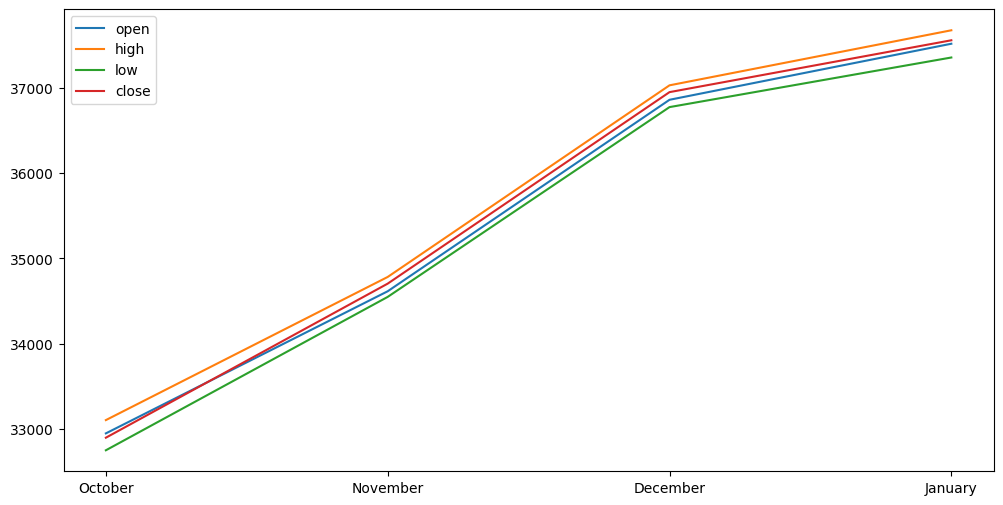

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(year_month_ag['Month'], year_month_ag['Open'], label='open')
plt.plot(year_month_ag['Month'], year_month_ag['High'], label='high')
plt.plot(year_month_ag['Month'], year_month_ag['Low'], label='low')
plt.plot(year_month_ag['Month'], year_month_ag['Close'], label='close')
plt.legend()
plt.show

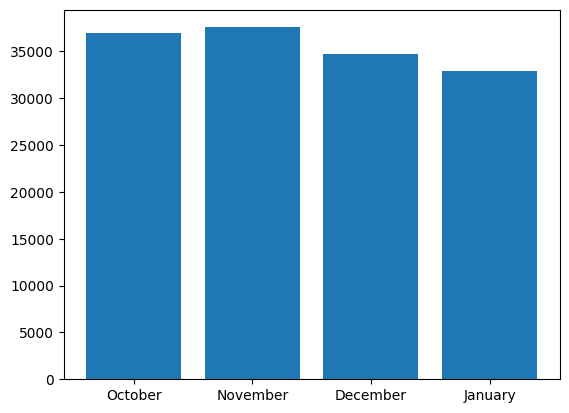

In [31]:
plt.bar(year_month_ag['Month'], monthly['Close'])
plt.show()

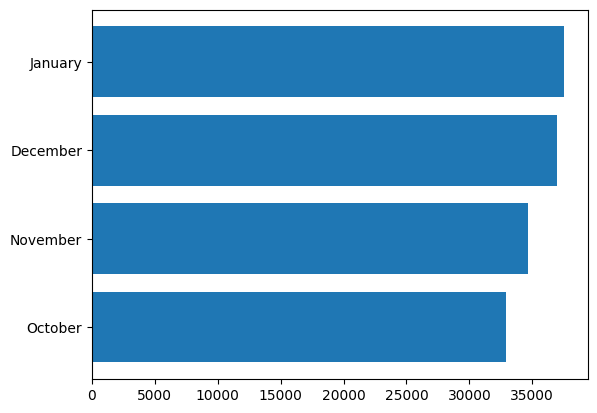

In [32]:
plt.barh(year_month_ag['Month'],year_month_ag['Close'])
plt.show()

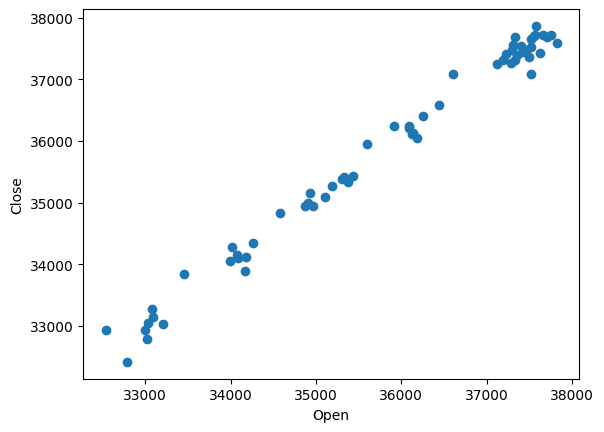

In [34]:
plt.scatter(df['Open'], df['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

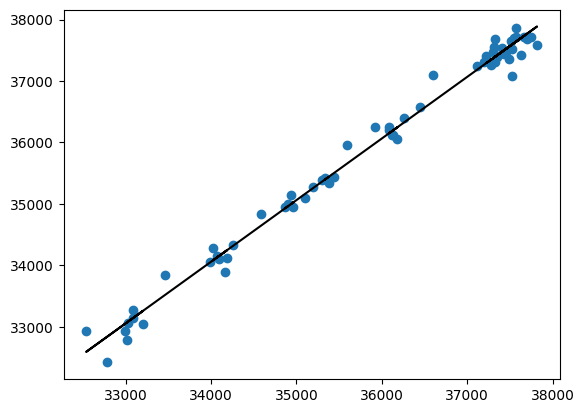

In [36]:
z = np.polyfit(df['Open'], df['Close'], 1)
p = np.poly1d(z)

plt.scatter(df['Open'], df['Close'])
plt.plot(df['Open'], p(df['Open']), color='black')
plt.show()

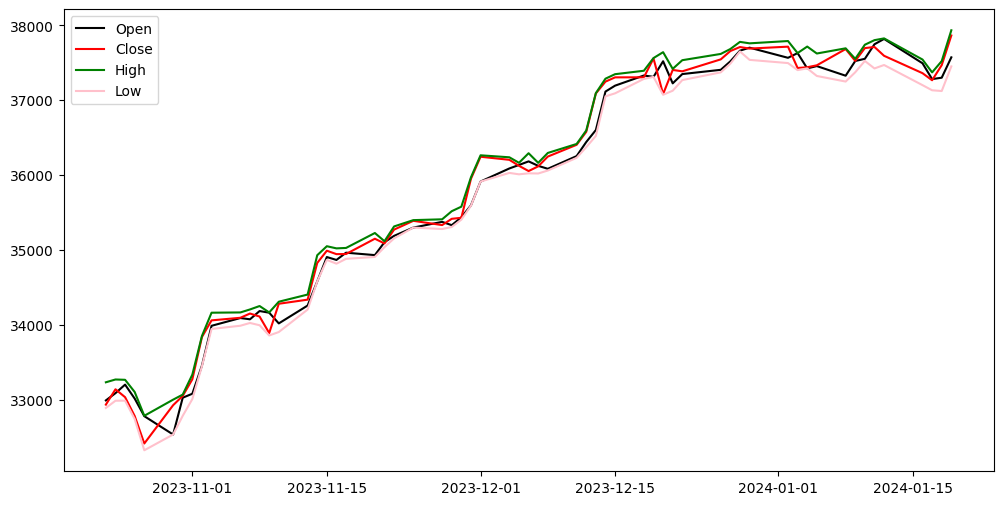

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], color = 'black', label='Open')
plt.plot(df['Date'], df['Close'], color = 'red', label='Close')
plt.plot(df['Date'], df['High'], color = 'green', label='High')
plt.plot(df['Date'], df['Low'], color = 'pink', label='Low')
plt.legend()
plt.show()

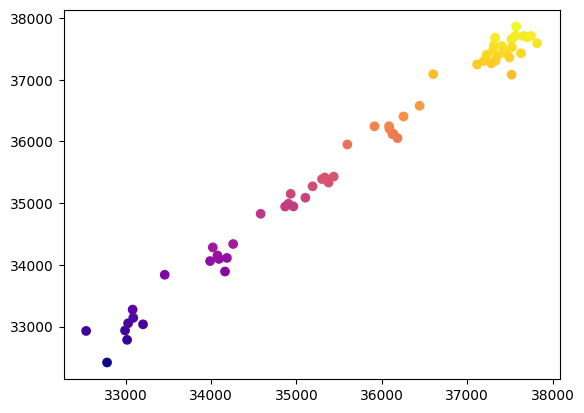

In [42]:
plt.scatter(df['Open'], df['Close'], c=df['Close'], cmap=plt.cm.plasma)
plt.savefig('output.png')
plt.show()